In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression

In [2]:
Cust_data = pd.read_excel('Data Set.xlsx')

In [3]:
Cust_data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
# custidand birthmonth are irrelevant, so drop it.

Cust_data.drop('custid',axis= 1, inplace=True)
Cust_data.drop('birthmonth', axis = 1, inplace=True)


In [5]:
# Drop these variable 
Cust_data.drop('lninc', axis = 1, inplace=True)
Cust_data.drop('lnlongmon', axis = 1, inplace=True)
Cust_data.drop('lnlongten', axis = 1, inplace=True)
Cust_data.drop('lntollmon', axis = 1, inplace=True)
Cust_data.drop('lntollten', axis = 1, inplace=True)
Cust_data.drop('lnequipmon', axis = 1, inplace=True)
Cust_data.drop('lnequipten', axis = 1, inplace=True)
Cust_data.drop('lncardmon', axis = 1, inplace=True)
Cust_data.drop('lncardten', axis = 1, inplace=True)
Cust_data.drop('lnwiremon', axis = 1, inplace=True)
Cust_data.drop('lnwireten', axis = 1, inplace=True)
Cust_data.drop('lncreddebt', axis = 1 , inplace=True)
Cust_data.drop('lnothdebt', axis = 1, inplace=True)

In [6]:
# Create variable total_spent = cardspent + card2spent
Cust_data['total_spent'] = Cust_data['cardspent'] + Cust_data['card2spent']

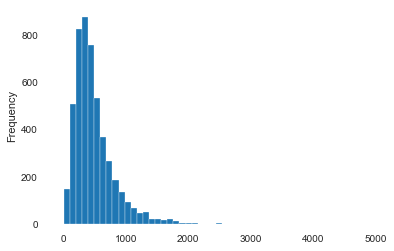

In [7]:
# Check if y variable is normal or not
Cust_data['total_spent'].plot.hist(bins = 50)
plt.show()

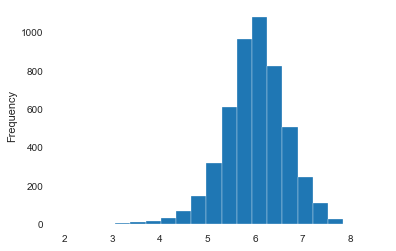

In [8]:
# Log transformation of Y-Variable
Cust_data['ln_total_spent'] = np.log(Cust_data['total_spent'])
Cust_data['ln_total_spent'].plot.hist(bins = 20)

In [9]:
# drop cardspent and card2spent
Cust_data.drop('cardspent', axis = 1, inplace=True)
Cust_data.drop('card2spent', axis = 1, inplace=True)

# we can remove total_spent
Cust_data.drop('total_spent', axis = 1, inplace=True)

In [16]:
profile_report = pandas_profiling.ProfileReport(Cust_data)
profile_report.to_file('report.html')

In [10]:
# Acoording to profile report, these variables are highly correlated and can be droppped
Cust_data.drop(['agecat','edcat','marital','spousedcat','address','commute','cardtenure','card2tenure','equip'], axis = 1, inplace=True)

In [11]:
# seperate categorical and numerical variables
cat_var = ['region','townsize', 'gender','jobcat','union','employ','empcat','retire','inccat',
           'default','jobsat','homeown','hometype','addresscat','cars','carown','cartype',
           'carcatvalue','carbought','carbuy','commutecat','commutecar','commutemotorcycle','commutecarpool',
           'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
           'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenurecat',
           'card2','card2type','card2benefit','card2fee','card2tenurecat','active','bfast','churn','tollfree',
           'callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer',
           'ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01',
           'response_02','response_03']

In [12]:
num_var = []
for i in Cust_data.columns:
    if i not in cat_var:
        num_var.append(i)

In [13]:
data_num =Cust_data[num_var]
data_car = Cust_data[cat_var]

In [14]:
data_num.drop('ln_total_spent', axis = 1, inplace= True)

C:\Users\Abhay\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
data_num

,age,ed,income,debtinc,creddebt,othdebt,spoused,reside,pets,pets_cats,...,longten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv
0,20,15,31,11.1,1.200909,2.240091,-1,3,0,0,...,34.40,29.0,161.05,29.50,126.10,14.25,60.0,0.00,0.00,13
1,22,17,15,18.6,1.222020,1.567980,-1,2,6,0,...,330.60,0.0,0.00,54.85,1975.00,16.00,610.0,45.65,1683.55,18
2,67,14,35,9.9,0.928620,2.536380,13,3,3,2,...,1858.35,0.0,0.00,0.00,0.00,23.00,1410.0,0.00,0.00,21
3,23,16,20,5.7,0.022800,1.117200,18,5,0,0,...,199.45,0.0,0.00,0.00,0.00,21.00,685.0,0.00,0.00,26
4,26,16,23,1.7,0.214659,0.176341,13,4,0,0,...,74.10,16.5,387.70,0.00,0.00,17.25,360.0,19.05,410.80,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,196,8.0,7.934080,7.745920,-1,1,4,4,...,2405.90,0.0,0.00,0.00,0.00,21.75,1565.0,0.00,0.00,19
4996,51,14,83,15.0,3.336600,9.113400,-1,1,1,0,...,289.00,36.5,1157.20,0.00,0.00,26.25,800.0,27.90,757.35,14
4997,75,17,108,10.8,3.557520,8.106480,-1,1,0,0,...,2109.25,44.0,3322.50,0.00,0.00,15.25,1070.0,0.00,0.00,16
4998,47,19,189,10.8,5.021352,15.390648,15,4,0,0,...,282.70,0.0,0.00,29.55,1032.85,9.50,345.0,0.00,0.00,24


In [16]:
def summ_var(x):
    n = x.count()
    nmiss = x.isnull().sum()
    total = n + nmiss
    percmiss = (nmiss/total) * 100
    return pd.Series([x.count(), x.isnull().sum(), total , round(percmiss,2), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'Total','PercMISS', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])



In [17]:
data_num.apply(lambda x: summ_var(x)).T

,N,NMISS,Total,PercMISS,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,5000.0,0.00,47.025600,47.000000,17.770338,3.157849e+02,18.0,18.000000,20.000000,23.000000,31.000000,47.000000,62.00000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,5000.0,0.00,14.543000,14.000000,3.281083,1.076550e+01,6.0,8.000000,9.000000,10.000000,12.000000,14.000000,17.00000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,5000.0,0.00,54.759600,38.000000,55.377511,3.066669e+03,9.0,9.000000,13.000000,16.000000,24.000000,38.000000,67.00000,109.100000,147.000000,272.010000,1073.000000
debtinc,5000.0,0.0,5000.0,0.00,9.954160,8.800000,6.399783,4.095723e+01,0.0,0.700000,1.900000,2.800000,5.100000,8.800000,13.60000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,5000.0,0.00,1.857326,0.926437,3.415732,1.166722e+01,0.0,0.033160,0.101088,0.175682,0.385520,0.926437,2.06382,4.299470,6.373010,14.280358,109.072596
othdebt,5000.0,0.0,5000.0,0.00,3.654460,2.098540,5.395172,2.910788e+01,0.0,0.114299,0.287692,0.457997,0.980301,2.098540,4.31478,8.062046,11.815981,24.064260,141.459150
spoused,5000.0,0.0,5000.0,0.00,6.112800,-1.000000,7.743518,5.996207e+01,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.00000,16.000000,18.000000,20.000000,24.000000
reside,5000.0,0.0,5000.0,0.00,2.204000,2.000000,1.393977,1.943173e+00,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,3.00000,4.000000,5.000000,6.000000,9.000000
pets,5000.0,0.0,5000.0,0.00,3.067400,2.000000,3.414497,1.165879e+01,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,5.00000,8.000000,10.000000,13.000000,21.000000
pets_cats,5000.0,0.0,5000.0,0.00,0.500400,0.000000,0.860783,7.409480e-01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,2.000000,2.000000,3.000000,6.000000


In [18]:
# Outlier Capping
def OT_Capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

data_num = data_num.apply(OT_Capping)

In [19]:
## Missing Value Treatment for numeric variables

def MissValTrt(x):
    x = x.fillna(x.median())
    return x

data_num = data_num.apply(MissValTrt)

In [20]:
# Missing Value Treatment for categorical variable

def MissValCat(x):
    x = x.fillna(x.mode())
    return x

data_car = data_car.apply(MissValCat)

In [21]:
# Creating Dummy Variables for categorical variables
# udf
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [22]:
catdum = Cust_data[['region','townsize','gender','empcat','inccat','jobsat',
         'hometype','addresscat','cars','carown','cartype','carcatvalue',
         'carbought','commutecat','reason','polview','card','cardtype','cardbenefit',
         'cardtenurecat','card2','card2type','card2benefit','card2tenurecat',
         'bfast','internet']]

In [23]:
for c in catdum :
    
    catdum[c] = catdum[c].astype('category')
    catdum= create_dummies(catdum,c)
 

C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# final dataset
data_final = pd.concat([data_num,catdum, Cust_data['ln_total_spent']], axis= 1)

In [25]:
data_final.to_csv('data_final.csv')

In [26]:
cv_var1 = data_final.apply(lambda x: sp.variation(x, nan_policy = 'omit'))

In [27]:
cv_var1.to_csv('CV3.csv')

In [28]:
data_final = data_final.drop(['cars_8','cars_7'], axis = 1)

In [29]:
# Feature Reduction
# linearity
corr_data = data_final.corr()
corr_data.to_csv('CorrMatrix.csv')

In [30]:
# Feature Reduction
# RFE - Recrusive Feature Reduction

features = data_final[data_final.columns.difference(['ln_total_spent'])]
target = data_final['ln_total_spent']


In [31]:
lm = RandomForestRegressor()

#create rfe  model and select 10 attributes
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features,target)


In [32]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [33]:
features.columns[rfe.support_]

Index(['age', 'cardmon', 'carvalue', 'commutetime', 'creddebt', 'debtinc',
       'income', 'longmon', 'longten', 'othdebt'],
      dtype='object')

In [34]:
# By F-regression
F_values, p_values = f_regression(features,target)

In [35]:
F_values

array([6.52414605e+00, 6.70884800e+00, 1.43366995e+01, 7.96107553e-02,
       2.68491310e-02, 7.38625989e+00, 9.61894113e+00, 6.54324303e-01,
       1.63204749e-03, 4.28607122e+02, 4.00695531e+01, 3.55733622e+02,
       2.75918052e+01, 3.71303834e+01, 1.56324214e+01, 1.22291631e+01,
       8.41612098e-01, 5.91106403e+00, 1.31811627e+00, 8.23176382e+00,
       6.12141444e-02, 4.98028886e+00, 6.06647448e+00, 4.30868727e-01,
       1.30980899e-02, 1.21995187e-01, 7.17409669e+01, 5.79435060e+01,
       2.66132095e+01, 9.11797188e+00, 1.21283836e-01, 1.52556185e+00,
       9.50540081e-02, 1.14467012e+00, 3.49725642e+00, 3.03619803e+00,
       5.11712188e+00, 4.45541216e+00, 1.20389355e+01, 8.40952793e-03,
       2.08202582e-05, 5.22711133e-05, 1.36927587e+02, 7.83977265e+01,
       6.66069594e+00, 4.02267529e-01, 4.61767619e-04, 1.23555274e+00,
       3.83992881e-01, 6.42189319e-01, 2.77710705e+00, 8.19393311e-01,
       5.11609999e+02, 8.13163915e-01, 2.10705583e+00, 1.86786956e-01,
      

In [36]:
import itertools

In [37]:
f_reg_result = [(i,v,z) for i,v,z in itertools.zip_longest(features.columns, F_values, ['%.3f' % p for p in p_values])]

In [38]:
f_reg_result = pd.DataFrame(f_reg_result, columns=['Var','F-Score','P-Value'])

In [39]:
f_reg_result.to_csv('f_reg_result.csv')

In [40]:
Final_list = [
'addresscat_4',
#'carcatvalue_1',
#'carcatvalue_2',
#'carcatvalue_3',
'card2_2',
'card2_3',
'card2_4',
'card2_5',
'card_2',
'card_3',
'card_4',
'carown_0',
#'carown_1',
#'carvalue',
'creddebt',
#'ed',
'empcat_5',
'equipmon',
'equipten',
'gender_1',
'hometype_2',
'inccat_2',
'inccat_3',
'inccat_4',
'inccat_5',
#'income',
'internet_4',
'othdebt',
'reason_2',
#'tenure',
#'tollmon',
'tollten',
#'wiremon',
'wireten',
#'cardtenurecat_5',
#'hourstv',
'bfast_3',
'internet_3',
'reason_4',
'card_5',
'jobsat_5',
'card2tenurecat_2',
'bfast_2',
'empcat_4',
'addresscat_3',
'cars_1',
'addresscat_2',
#'longmon',
#'longten',
'card2tenurecat_5',
'card2benefit_3',
'polview_6',
'cardtenurecat_3',
'card2tenurecat_4',
'spoused',
'jobsat_4',
'cardtenurecat_4',
'hometype_3',
'region_5',
#'commutetime',
'cardmon',
#'age'
]

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
X = features[Final_list]

In [101]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Features'] = X.columns

vif.sort_values(by = 'VIF_Factor', ascending  = False)

,VIF_Factor,Features
11,6.824475,equipmon
12,6.171229,equipten
35,5.116453,card2tenurecat_5
20,3.640712,othdebt
9,2.878853,creddebt
45,2.761023,cardmon
15,2.661677,inccat_2
18,2.575641,inccat_5
23,2.513203,wireten
30,2.426810,bfast_2


In [87]:
# Split data into train and test
from sklearn.model_selection import train_test_split
 

In [88]:
train , test = train_test_split(data_final, test_size = 0.3, random_state = 123)

In [89]:
import statsmodels.formula.api as smp

In [103]:
"+".join(Final_list)

'addresscat_4+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+carown_0+creddebt+empcat_5+equipmon+equipten+gender_1+hometype_2+inccat_2+inccat_3+inccat_4+inccat_5+internet_4+othdebt+reason_2+tollten+wireten+bfast_3+internet_3+reason_4+card_5+jobsat_5+card2tenurecat_2+bfast_2+empcat_4+addresscat_3+cars_1+addresscat_2+card2tenurecat_5+card2benefit_3+polview_6+cardtenurecat_3+card2tenurecat_4+spoused+jobsat_4+cardtenurecat_4+hometype_3+region_5+cardmon'

In [182]:
formula = 'ln_total_spent ~ card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+carown_0+creddebt+gender_1+inccat_2+inccat_3+inccat_4+inccat_5+internet_4+reason_2+internet_3+card_5+bfast_2+card2benefit_3+region_5'

In [183]:
# Dropping variables one at a time which have p-values greater than 5%
ols_model = smp.ols(formula= formula, data = train).fit()

In [184]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spent   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     78.54
Date:                Mon, 29 Jun 2020   Prob (F-statistic):          8.39e-274
Time:                        12:50:38   Log-Likelihood:                -2957.5
No. Observations:                3500   AIC:                             5959.
Df Residuals:                    3478   BIC:                             6095.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.5470      0.044    150.

In [215]:
m1  = ols_model.params[1:]

In [185]:
train_predicted = np.exp(ols_model.predict(train))
test_predicted = np.exp(ols_model.predict(test))

In [186]:
train_actual = np.exp(train.ln_total_spent)
test_actual = np.exp(test.ln_total_spent)

In [191]:
train_mape = '%.3f' %  np.mean(np.abs((train_actual-train_predicted)/train_actual))
test_mape = '%.3f' %  np.mean(np.abs((test_actual-test_predicted)/test_actual))

In [192]:
print(train_mape)
print(test_mape)

0.536
0.484


In [189]:
#Decile Analysis

train_results = pd.concat([train_actual,train_predicted], axis= 1)
test_results = pd.concat([test_actual,test_predicted],axis=1)

train_results.columns = ['actual','predicted']
test_results.columns = ['actual','predicted']

In [190]:
train_results["Deciles"] = pd.qcut(train_results['predicted'], 10, labels=False)
train_results.groupby(['Deciles']).apply(np.mean)[['actual','predicted']]

,actual,predicted
Deciles,,
0,273.555800,225.491571
1,301.532257,266.014191
2,342.464800,297.081067
3,388.543086,326.080072
4,436.950114,360.899399
5,454.128257,401.836787
6,545.480486,451.774138
7,560.141943,518.802660
8,700.898314,617.929139


In [59]:
test_results["Deciles"] = pd.qcut(test_results['predicted'], 10, labels=False)
test_results.groupby(['Deciles']).apply(np.mean)[['actual','predicted']]

,actual,predicted
Deciles,,
0,280.788600,228.594018
1,323.103133,267.329266
2,360.854000,300.780092
3,385.887000,334.082168
4,431.441067,374.447166
5,487.012467,416.458032
6,549.417867,461.526240
7,624.001400,536.300640
8,734.515067,628.787513
